# Atividade 07 - Redes Neurais Artificiais

Aluno: Pedro Henrique Cardoso Paulo<br>
Disciplina: HIML<br>
Professor: Helon

Nessa atividade paritremos da atividade 03 para testarmos também redes neurais com tensorflow e keras

## Passo 0 - Importando bibliotecas

In [1]:
# Pacotes padrao
import numpy as np
import pandas as pd
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from scipy import stats
import warnings
import json

# Normalizadores
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Reducao de dimensionalidade
from sklearn.decomposition import PCA

# Resampling
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV

#Pipeline
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Tensorflow imports
import tensorflow as tf
from tensorflow import keras

# Metricas de erro
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


rs = 33

2022-05-09 16:19:17.753546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-09 16:19:17.754465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Passo 1 - Importando os dados

In [2]:
fname = join(getcwd(),'data','data_postAR.pkl')
with open(fname, 'rb') as file:
    X1, y = pickle.load(file)

In [3]:
print(X1.shape, y.shape)

(850, 124) (850,)


## Passo 2 - Aplicando a reamostragem e Normalizando

A reamostragem será feita de modo a garantir um total de 40% das amostras para teste

In [4]:
#Pequenas melhorias desde a última rodada
# 1 - Usando o parâmetro stratify pra melhorar a segregação das classes
# 2 - Estamos usando 40% só pra treino, pra deixar mais interessante o erro
size = 0.4
X1_tr, X1_te, y_tr, y_te = train_test_split(X1, y, test_size=size, random_state=rs, stratify=y)

Para padronizar, vamos por a normalização fora do pipeline (só teremos dados normalizados):

In [6]:
scaler = MinMaxScaler()
X1_tr = scaler.fit_transform(X1_tr)
X1_te = scaler.transform(X1_te)
X1_tr.shape

(510, 124)

Zerando a primeira classe

In [25]:
y_tr, y_te = y_tr - 1, y_te - 1

## Passo 3 - Montando o Pipeline da ANN com Keras

### 3.1 - Montando rede básica

Montar uma rede neural com keras pode ser feito usando programação de alto nível. Começaremos usando uma rede neural com apenas uma Hidden layer de 10 neurônios

In [57]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[124], name='Inputs'), #A primeira layer precisa sempre ter o formato dos inputs declarado
                                            #Inputlayer é uma camada de entrada apenas. Não realiza nenhuma operação de prerpoc
keras.layers.Dense(10, activation="relu", name='Hidden_01'),
keras.layers.Dense(17, activation="softmax", name='Output'), #Camada de outputs. Um neurônio por classe de saída
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_01 (Dense)           (None, 10)                1250      
                                                                 
 Output (Dense)              (None, 17)                187       
                                                                 
Total params: 1,437
Trainable params: 1,437
Non-trainable params: 0
_________________________________________________________________


#### Bizuzário do livro do Géron:

In [13]:
#Pegando as layers
model.layers

In [14]:
#Pegando layer pelo nome
model.get_layer('Hidden_01')

In [15]:
#Pegando parâmetros das layers
weights, biases = model.get_layer('Hidden_01').get_weights() #da pra setar com o set!

In [16]:
weights #aleatoriamente inicializados

array([[-0.14009479, -0.06635055, -0.03019539, ..., -0.20580912,
         0.0221246 ,  0.06328793],
       [-0.15776868, -0.09474724, -0.07826428, ..., -0.12612174,
        -0.03926997, -0.05747585],
       [ 0.08257438,  0.03192608, -0.10738739, ..., -0.16887121,
         0.14020841, -0.18882939],
       ...,
       [-0.17834042, -0.09108505, -0.14222658, ...,  0.04848702,
         0.11135848,  0.21040644],
       [-0.16779819, -0.05593178,  0.02962837, ...,  0.15967847,
        -0.14950815, -0.1764892 ],
       [-0.15674585,  0.19366373,  0.10447691, ..., -0.11170357,
        -0.09364111, -0.00579174]], dtype=float32)

In [17]:
biases #inicializados com 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Compilando o modelo

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Executando o fit:

In [36]:
model.fit(X1_tr, y_tr, epochs=10)#, validation_split=0.05)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 2.9526 - accuracy: 0.0569
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 2.8917 - accuracy: 0.0588
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 2.8517 - accuracy: 0.0686
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 2.8227 - accuracy: 0.0765
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 2.8025 - accuracy: 0.0667
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 2.7865 - accuracy: 0.0824
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 2.7724 - accuracy: 0.0941
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 2.7588 - accuracy: 0.1020
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.1137
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 2.7332 - accuracy: 0.1216


#### Dá pra ver que a acurácia não ficou grande coisa. Vamos tentar melhorar aumentando o número de epochs:

In [58]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[124], name='Inputs'), #A primeira layer precisa sempre ter o formato dos inputs declarado
                                            #Inputlayer é uma camada de entrada apenas. Não realiza nenhuma operação de prerpoc
keras.layers.Dense(10, activation="relu", name='Hidden_01'),
keras.layers.Dense(17, activation="softmax", name='Output'), #Camada de outputs. Um neurônio por classe de saída
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.fit(X1_tr, y_tr, epochs=150, validation_split=0.05)



Epoch 1/150
16/16 [==============================] - 1s 33ms/step - loss: 2.9514 - accuracy: 0.1033 - val_loss: 3.0062 - val_accuracy: 0.0769
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 2.8751 - accuracy: 0.0930 - val_loss: 2.9067 - val_accuracy: 0.0385
Epoch 3/150
16/16 [==============================] - 0s 6ms/step - loss: 2.8326 - accuracy: 0.0930 - val_loss: 2.8646 - val_accuracy: 0.1538
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 2.8118 - accuracy: 0.1405 - val_loss: 2.8434 - val_accuracy: 0.1538
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7992 - accuracy: 0.1384 - val_loss: 2.8307 - val_accuracy: 0.1538
Epoch 6/150
16/16 [==============================] - 0s 6ms/step - loss: 2.7893 - accuracy: 0.1405 - val_loss: 2.8294 - val_accuracy: 0.1923
Epoch 7/150
16/16 [==============================] - 0s 8ms/step - loss: 2.7811 - accuracy: 0.1612 - val_loss: 2.8214 - val_accuracy: 0.1923
Epoch 8/150


Epoch 59/150
16/16 [==============================] - 0s 10ms/step - loss: 2.1911 - accuracy: 0.4091 - val_loss: 2.1967 - val_accuracy: 0.5000
Epoch 60/150
16/16 [==============================] - 0s 8ms/step - loss: 2.1774 - accuracy: 0.4318 - val_loss: 2.1865 - val_accuracy: 0.4615
Epoch 61/150
16/16 [==============================] - 0s 9ms/step - loss: 2.1657 - accuracy: 0.4525 - val_loss: 2.1710 - val_accuracy: 0.5000
Epoch 62/150
16/16 [==============================] - 0s 3ms/step - loss: 2.1523 - accuracy: 0.4628 - val_loss: 2.1495 - val_accuracy: 0.5000
Epoch 63/150
16/16 [==============================] - 0s 6ms/step - loss: 2.1392 - accuracy: 0.4525 - val_loss: 2.1418 - val_accuracy: 0.4615
Epoch 64/150
16/16 [==============================] - 0s 5ms/step - loss: 2.1256 - accuracy: 0.4731 - val_loss: 2.1204 - val_accuracy: 0.5000
Epoch 65/150
16/16 [==============================] - 0s 3ms/step - loss: 2.1136 - accuracy: 0.4628 - val_loss: 2.1133 - val_accuracy: 0.4615
Epoch

16/16 [==============================] - 0s 3ms/step - loss: 1.5020 - accuracy: 0.6364 - val_loss: 1.4375 - val_accuracy: 0.6923
Epoch 117/150
16/16 [==============================] - 0s 5ms/step - loss: 1.4923 - accuracy: 0.6364 - val_loss: 1.4275 - val_accuracy: 0.6923
Epoch 118/150
16/16 [==============================] - 0s 4ms/step - loss: 1.4826 - accuracy: 0.6384 - val_loss: 1.4152 - val_accuracy: 0.6923
Epoch 119/150
16/16 [==============================] - 0s 10ms/step - loss: 1.4721 - accuracy: 0.6364 - val_loss: 1.4025 - val_accuracy: 0.6923
Epoch 120/150
16/16 [==============================] - 0s 10ms/step - loss: 1.4624 - accuracy: 0.6364 - val_loss: 1.3893 - val_accuracy: 0.7308
Epoch 121/150
16/16 [==============================] - 0s 12ms/step - loss: 1.4521 - accuracy: 0.6446 - val_loss: 1.3822 - val_accuracy: 0.7308
Epoch 122/150
16/16 [==============================] - 0s 13ms/step - loss: 1.4426 - accuracy: 0.6467 - val_loss: 1.3739 - val_accuracy: 0.7308
Epoch 123

#### Avaliando modelo

In [70]:
loss, acc = model.evaluate(X1_te, y_te)
print('Test loss:', loss)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 873us/step - loss: 1.2039 - accuracy: 0.7147
Test loss: 1.2038946151733398
Test accuracy: 0.7147058844566345


#### Visualizando a matriz de confusão

In [67]:
y_pred = np.argmax(model.predict(X1_te), 1)

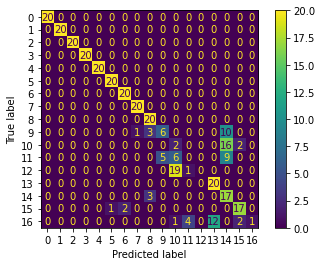

In [68]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred))
cm.plot()

### 3.2 - Testando com mais neurônios na hidden layer

In [71]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[124], name='Inputs'), #A primeira layer precisa sempre ter o formato dos inputs declarado
                                            #Inputlayer é uma camada de entrada apenas. Não realiza nenhuma operação de prerpoc
keras.layers.Dense(1000, activation="relu", name='Hidden_01'),
keras.layers.Dense(17, activation="softmax", name='Output'), #Camada de outputs. Um neurônio por classe de saída
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.fit(X1_tr, y_tr, epochs=10, validation_split=0.05)

Epoch 1/10
16/16 [==============================] - 0s 8ms/step - loss: 2.7962 - accuracy: 0.1095 - val_loss: 2.7578 - val_accuracy: 0.0769
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 2.7015 - accuracy: 0.1653 - val_loss: 2.6792 - val_accuracy: 0.1154
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 2.6169 - accuracy: 0.2707 - val_loss: 2.5834 - val_accuracy: 0.3077
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 2.5379 - accuracy: 0.3843 - val_loss: 2.4987 - val_accuracy: 0.3462
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 2.4695 - accuracy: 0.4814 - val_loss: 2.4180 - val_accuracy: 0.5769
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 2.4021 - accuracy: 0.5744 - val_loss: 2.3407 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 2.3400 - accuracy: 0.5950 - val_loss: 2.2837 - val_accuracy: 0.6538
Epoch 8/10
16/16 [==

Mesmo com muitos neurônios, não teve um bom resultado!

#### Avaliando modelo

In [72]:
loss, acc = model.evaluate(X1_te, y_te)
print('Test loss:', loss)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 1ms/step - loss: 2.1192 - accuracy: 0.7059
Test loss: 2.1191818714141846
Test accuracy: 0.7058823704719543


#### Visualizando a matriz de confusão

In [73]:
y_pred = np.argmax(model.predict(X1_te), 1)

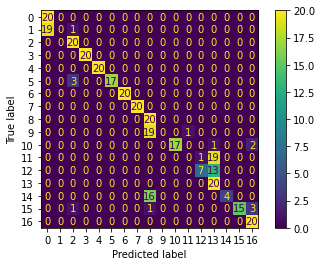

In [74]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred))
cm.plot()

### 3.3 - Testando com duas camadas

In [75]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[124], name='Inputs'), #A primeira layer precisa sempre ter o formato dos inputs declarado
                                            #Inputlayer é uma camada de entrada apenas. Não realiza nenhuma operação de prerpoc
keras.layers.Dense(200, activation="relu", name='Hidden_01'),
keras.layers.Dense(100, activation="relu", name='Hidden_02'),
keras.layers.Dense(17, activation="softmax", name='Output'), #Camada de outputs. Um neurônio por classe de saída
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_01 (Dense)           (None, 200)               25000     
                                                                 
 Hidden_02 (Dense)           (None, 100)               20100     
                                                                 
 Output (Dense)              (None, 17)                1717      
                                                                 
Total params: 46,817
Trainable params: 46,817
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.fit(X1_tr, y_tr, epochs=50, validation_split=0.05)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 2.8596 - accuracy: 0.0599 - val_loss: 2.7654 - val_accuracy: 0.1923
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 2.7779 - accuracy: 0.1674 - val_loss: 2.7157 - val_accuracy: 0.2308
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 2.7168 - accuracy: 0.2066 - val_loss: 2.6701 - val_accuracy: 0.2308
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 2.6632 - accuracy: 0.2686 - val_loss: 2.6307 - val_accuracy: 0.2692
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 2.6160 - accuracy: 0.2996 - val_loss: 2.5932 - val_accuracy: 0.3846
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 2.5702 - accuracy: 0.3512 - val_loss: 2.5444 - val_accuracy: 0.3846
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 2.5229 - accuracy: 0.3740 - val_loss: 2.4873 - val_accuracy: 0.4231
Epoch 8/50
16/16 [==

#### Avaliando modelo

In [77]:
loss, acc = model.evaluate(X1_te, y_te)
print('Test loss:', loss)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 954us/step - loss: 0.6525 - accuracy: 0.9529
Test loss: 0.6525071263313293
Test accuracy: 0.9529411792755127


#### Visualizando a matriz de confusão

In [78]:
y_pred = np.argmax(model.predict(X1_te), 1)

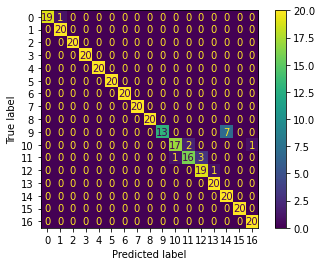

In [79]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred))
cm.plot()

### 3.3 - Testando com três camadas

In [80]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[124], name='Inputs'), #A primeira layer precisa sempre ter o formato dos inputs declarado
                                            #Inputlayer é uma camada de entrada apenas. Não realiza nenhuma operação de prerpoc
keras.layers.Dense(200, activation="relu", name='Hidden_01'),
keras.layers.Dense(100, activation="relu", name='Hidden_02'),
keras.layers.Dense(100, activation="relu", name='Hidden_03'),
keras.layers.Dense(17, activation="softmax", name='Output'), #Camada de outputs. Um neurônio por classe de saída
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_01 (Dense)           (None, 200)               25000     
                                                                 
 Hidden_02 (Dense)           (None, 100)               20100     
                                                                 
 Hidden_03 (Dense)           (None, 100)               10100     
                                                                 
 Output (Dense)              (None, 17)                1717      
                                                                 
Total params: 56,917
Trainable params: 56,917
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.fit(X1_tr, y_tr, epochs=50, validation_split=0.05)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5451 - accuracy: 0.9504 - val_loss: 0.4861 - val_accuracy: 0.8462
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.9483 - val_loss: 0.4529 - val_accuracy: 0.9231
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.9504 - val_loss: 0.4173 - val_accuracy: 0.9615
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.9628 - val_loss: 0.4089 - val_accuracy: 0.9231
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.9421 - val_loss: 0.3763 - val_accuracy: 1.0000
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.9545 - val_loss: 0.3601 - val_accuracy: 0.9615
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.9463 - val_loss: 0.3669 - val_accuracy: 1.0000
Epoch 8/50
16/16 [==

#### Avaliando modelo

In [87]:
loss, acc = model.evaluate(X1_te, y_te)
print('Test loss:', loss)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 969us/step - loss: 0.1279 - accuracy: 0.9971
Test loss: 0.12789514660835266
Test accuracy: 0.9970588088035583


#### Visualizando a matriz de confusão

In [88]:
y_pred = np.argmax(model.predict(X1_te), 1)

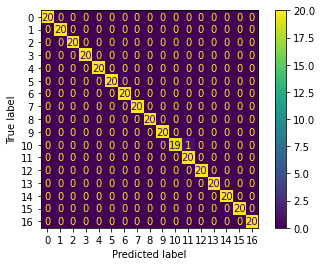

In [89]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred))
cm.plot()

## Passo 4 - Relembrando o Pipeline a ser usado

Antes de iniciarmos as comparações de modelo, vamos definir o Pipeline que pretendemos estudar. Até agora, todos os nossos estudos focaram nas seguintes etapas:

* Adimensionalizar os dados (MinMaxScaler)
* Aplicar um método de Feature Extraction (PCA)
* Ajuste de um método

Como para adequação do uso das redes neurais já considermos os inputs normalizados, aapenas os dois últimos passos devem ser contemplados no Pipeline a ser usado e os hiperparâmetros serão os adequados para cada método. Abaixo, a imagem tenta sumarizar o nosso pipeline.

<img src="images\Workflow.png">

De modo a facilitar a definição do Pipeline, faremos um método de conveniência para declará-lo.

In [90]:
def declara_Pipeline(tupla_metodo):
    
    steps = [
        #('Scaler', MinMaxScaler()),
        ('PCA',    PCA(n_components=0.99)),
        tupla_metodo,
    ]
    return Pipeline(steps)

## Passo 5 - Listando os modelos a serem testados e definindo hiperparâmetros a tunar

Nessa etapa, vamos criar a lista dos modelos que queremos testar. Por praticidade e sabendo que todos os métodos podem apresentar bons resultados para o dado conjunto de dados, ficaremos apenas com o SVM e o KNN.

### 5.1 - Lista de modelos testados

In [94]:
models = [
    #('SoftMax', LogisticRegression(multi_class='multinomial', max_iter=5000, solver='saga', random_state=rs)), #cortei pq demora
    ('SVM',     SVC(max_iter=-1, random_state=71)),
    ('KNN',     KNeighborsClassifier()),
    ('ANN',     model),
]


### 5.2 - Lista de parâmetros

A lista é em grande parte inspirada nos testes que fizemos na Atividade 03. Algumas variáveis que não tinha sensibilidade (como gamme e epsilon dos kernels do SVM) usei os valores do material de aula.

In [95]:
parameters = [
    #{
    #    'PCA__n_components'  : stats.uniform(loc=0.7, scale=0.3),
    #    'SoftMax__l1_ratio'  : stats.uniform(),
    #    'SoftMax__C'         : stats.loguniform(1e-3, 1e3),
    #    'SoftMax__penalty'   : ['elasticnet', 'none'],
    #},
    {
        'PCA__n_components' : stats.uniform(loc=0.7, scale=0.3),
        'SVM__C'            : stats.loguniform(1e-3, 1e3),
        'SVM__kernel'       : ['linear', 'poly', 'rbf', 'sigmoid'],
        'SVM__degree'       : stats.randint(2,6),
        'SVM__gamma'        : stats.loguniform(1e-4, 1e0),
    },
    {
        'PCA__n_components' : stats.uniform(loc=0.7, scale=0.3),
        'KNN__n_neighbors'  : stats.randint(1,100),
        'KNN__weights'      : ['uniform', 'distance']
    },
    {},
]

### 5.3 - Configurando KFolds

In [96]:
kfolds = 5 # Numero de divisoes do conjunto de treino. Uma será para validação e as demais para treino
niters = 50 # Numero de vezes a reamostrar
rkf = RepeatedKFold(n_splits=kfolds, n_repeats=niters, random_state=rs)

## Passo 6 - Executando os modelos

Iniciando avaliação do modelo: SVM

    Tempo de execução: 0:01:55.616629
    Score treino: 0.9980392156862745
    Score teste : 1.0

    Resultados dos parâmetros:
        Parâmetro PCA__n_components: 0.9703888953095935
        Parâmetro SVM__C: 677.5627455306202
        Parâmetro SVM__degree: 5
        Parâmetro SVM__gamma: 0.0038576697013349903
        Parâmetro SVM__kernel: rbf

Iniciando avaliação do modelo: KNN

    Tempo de execução: 0:01:02.062041
    Score treino: 0.9980392156862745
    Score teste : 0.9941176470588236

    Resultados dos parâmetros:
        Parâmetro KNN__n_neighbors: 4
        Parâmetro KNN__weights: uniform
        Parâmetro PCA__n_components: 0.9858614217375913

Iniciando avaliação do modelo: ANN


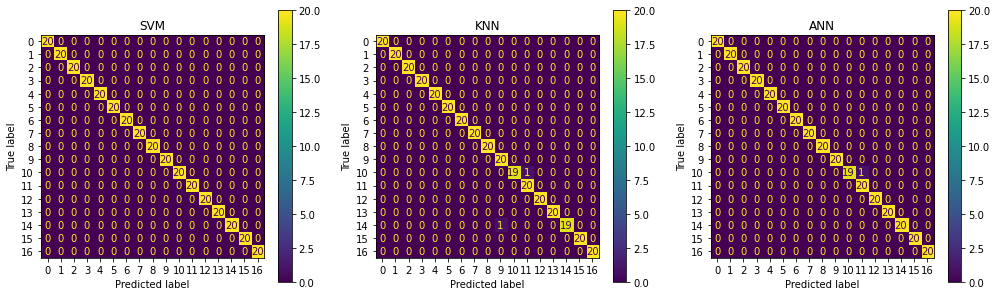

In [99]:
n_iter = 100 #Numero de iterações do rdmsearch 

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(17,5))

#Loop principal, iterando sobre as listas
for model, params, ax in zip(models, parameters, axs):
    
    #print(params)
    model_name = model[0]
    model_exec = model[1]
    print('Iniciando avaliação do modelo: {}'.format(model_name))
    if not model_name == 'ANN':
    
        #Primeira etapa - criacao do Pipeline
        pipeline = declara_Pipeline(model)
    
        t0 = datetime.now()
    
        #rkf = RepeatedKFold(n_splits=kfolds, n_repeats=niters, random_state=71)
    
        rdmsearch = RandomizedSearchCV(pipeline, verbose=0, scoring='accuracy', 
                                   param_distributions=params, n_iter=n_iter, n_jobs=6, 
                                   cv=rkf, random_state=rs)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            rdmsearch.fit(X1_tr, y_tr)
        print()
        print('    Tempo de execução: {}'.format(datetime.now() - t0))
        print('    Score treino: {}'.format(rdmsearch.score(X1_tr, y_tr)))
        print('    Score teste : {}'.format(rdmsearch.score(X1_te, y_te)))
        print()
        print('    Resultados dos parâmetros:')
        for par in rdmsearch.best_params_.keys():
            print('        Parâmetro {}: {}'.format(par, rdmsearch.best_params_[par]))  
        print()
        y_pred = rdmsearch.predict(X1_te)
        
    else:
        y_pred = np.argmax(model_exec.predict(X1_te), 1)
    cm = confusion_matrix(y_te, y_pred)
    cmgraph = ConfusionMatrixDisplay(cm)
    ax.set_title(model_name)
    cmgraph.plot(ax=ax)


## 7 - Conclusões

* Foram necessárias 3 camadas de neurônios par aobtermos um resuldado da ANN equivalente aos demais métodos no conjunto de teste
* A convergência da rede para valores aceitáveis demandou, pelo menos, 50 epochs
* Se comparado com o SoftMax do SkLearn com testagem de hiperparâmetros, a ANN do tensorflow/keras é bem mais eficiente (não rodamos nesse estudo, mas temos o histórico do RandomizedSearchCV dele